In [60]:
%pip install matplotlib numpy pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.


In [61]:
# loading preprocess import data
data=pd.read_csv("../assets/single_feature_data.csv")
X=data.iloc[:,0]
Y=data.iloc[:,1]
# print(X)
# print(Y)

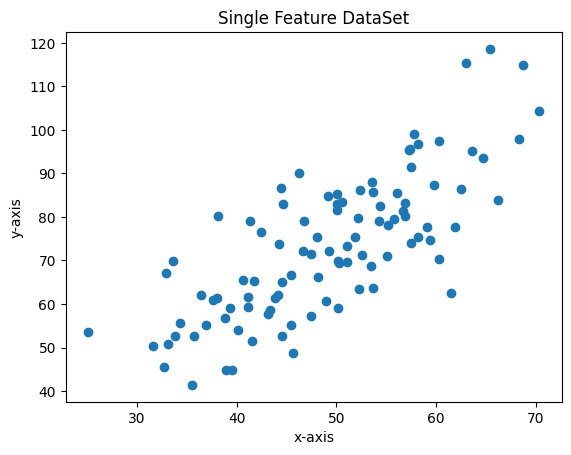

In [62]:
# printing complete dataset
fig, plot_data_set = plt.subplots()
plot_data_set.set_title("Single Feature DataSet")
plot_data_set.set_xlabel("x-axis")
plot_data_set.set_ylabel("y-axis")
plot_data_set.scatter(X,Y,label="Data Points")

fig.savefig("../assets/single_feature_dataset.png", bbox_inches='tight')

plt.show()

In [63]:
# Building the model
m = 0
c = 0

alpha = 0.00001  # The learning Rate
epochs = 100  # The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X

history = [] # To store (m, c) at each epoch

# Performing Gradient Descent
for i in range(epochs):
    Y_pred = m*X + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    m = m - alpha * D_m  # Update m
    c = c - alpha * D_c  # Update c

    # Store the current state
    history.append((m, c))

final_m, final_c = m, c
print(f"Final Weights: m={m}, c={c}")

Final Weights: m=1.4724042147529013, c=0.029597287663210802


In [64]:
print(history)

[(0.07424335285415495, 0.0014629895049539552), (0.14476500566904377, 0.0028530063038672963), (0.21175152093213523, 0.004173708394003099), (0.2753801090709894, 0.005428570403448703), (0.3358190972561007, 0.00662089278310034), (0.3932283747034525, 0.007753810537869222), (0.44775981565481265, 0.008830301520207126), (0.49955768115474697, 0.009853194307891663), (0.5487590006872348, 0.010825175686911583), (0.5954939346814911, 0.011748797759247776), (0.6398861188459882, 0.012626484694353311), (0.6820529912415997, 0.013460539142193273), (0.7221061029591238, 0.014253148324809834), (0.7601514132230724, 0.015006389822527532), (0.7962895697024086, 0.01572223707010593), (0.8306161747697842, 0.016402564577379507), (0.8632220384136553, 0.017049152888195737), (0.894193418472344, 0.017663693290770072), (0.9236122488255752, 0.018247792291918828), (0.9515563561471606, 0.0188029758670064), (0.978099665792239, 0.019330693496849852), (1.0033123973637403, 0.01983232200226037), (1.0272612504754357, 0.02030916

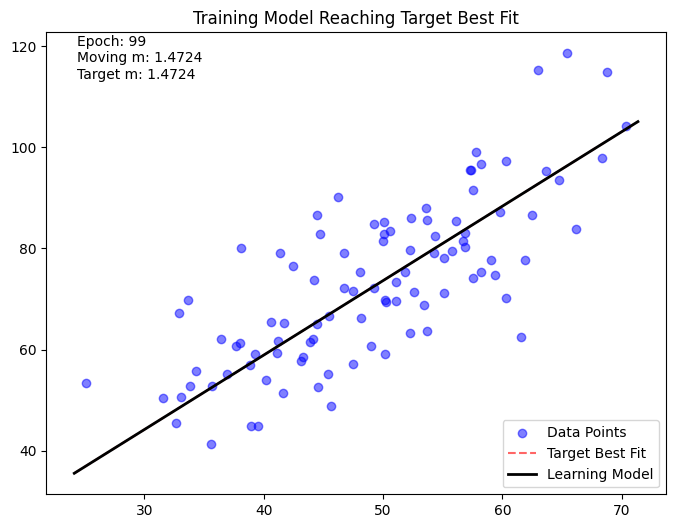

In [ ]:
# --- Animation Setup ---
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X, Y, color='blue', label='Data Points', alpha=0.5)

# DRAW THE TARGET LINE (Static Red Line)
x_range = np.array([min(X)-1, max(X)+1])
y_target = final_m * x_range + final_c
ax.plot(x_range, y_target, color='red', linestyle='--', alpha=0.6, label='Target Best Fit')

# SETUP THE MOVING LINE (The learning line)
line, = ax.plot([], [], color='black', lw=2, label='Learning Model')
text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

ax.set_title("Training Model Reaching Target Best Fit")
ax.legend()

# --- 4. Animation Logic ---
def init():
    line.set_data([], [])
    text.set_text('')
    return line, text

def animate(i):
    curr_m, curr_c = history[i]
    y_vals = curr_m * x_range + curr_c
    line.set_data(x_range, y_vals)
    
    # Slow down the visual by adding the epoch count
    text.set_text(f'Epoch: {i}\nMoving m: {curr_m:.4f}\nTarget m: {final_m:.4f}')
    return line, text

# --- 5. Control Speed and Save ---
# To slow it down: increase 'interval' (ms) and decrease 'fps'
anim = FuncAnimation(fig, animate, init_func=init, 
                     frames=len(history), interval=50, blit=True)

# Add a pause at the end by extending history
history.extend([history[-1]] * 40) 

anim.save('../assets/single_feature_training.gif', writer='pillow', fps=20)
plt.show()